In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.layers import Dense, Flatten, Dropout,BatchNormalization ,Activation
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import cv2

In [18]:
print("Num GPU's: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPU's:  0


In [2]:
import splitfolders
input_folder = r"D:\project\crop_30_in"


splitfolders.ratio(input_folder, output=r"D:\project\crop_30_out", 
                   seed=42, ratio=(.8, .2), 
                   group_prefix=None) 

Copying files: 1076 files [00:00, 2339.21 files/s]


In [2]:
train_path = r"D:\project\crop_30_out\train"

test_path = r"D:\project\crop_30_out\val"

train_datagen = ImageDataGenerator(
        rotation_range=10, # rotation
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2],rescale=1./255) # brightness

test_datagen = ImageDataGenerator(
        rotation_range=10, # rotation
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2],rescale=1./255) # brightness



In [3]:
train_batches = train_datagen.flow_from_directory(directory = train_path, class_mode='categorical'\
                                                  , batch_size=5,color_mode='grayscale',target_size=(28,32))

test_batches = test_datagen.flow_from_directory(directory = test_path, class_mode='categorical'\
                                                , batch_size=5,color_mode='grayscale',target_size=(28,32))

Found 855 images belonging to 20 classes.
Found 221 images belonging to 20 classes.


In [7]:
#train_batches.type()


AttributeError: 'DirectoryIterator' object has no attribute 'type'

In [6]:
from tensorflow.keras import datasets, layers, models

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28,32,1)))
model.add(layers.MaxPooling2D((2, 2),padding='same'))
model.add(layers.Conv2D(12, kernel_size=(5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2),padding='same'))

model.add(layers.GlobalAveragePooling2D()) 
model.add(layers.Dense(240, activation='relu'))
model.add(layers.Dense(20,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 10, 12)         1812      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 5, 12)         0         
 2D)                                                             
                                                                 
 global_average_pooling2d (G  (None, 12)               0         
 lobalAveragePooling2D)                                          
                                                        

In [8]:
# opt = tf.keras.optimizers.Adam
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
history=model.fit(
    train_batches,
    #steps_per_epoch=2000,
    epochs=1000,verbose=1)

Epoch 1/1000
171/171 [==============================] - 5s 14ms/step - loss: 2.9999 - accuracy: 0.0409
Epoch 2/1000
171/171 [==============================] - 2s 12ms/step - loss: 2.9971 - accuracy: 0.0409
Epoch 3/1000
171/171 [==============================] - 2s 12ms/step - loss: 2.9961 - accuracy: 0.0409
Epoch 4/1000
171/171 [==============================] - 2s 12ms/step - loss: 2.9927 - accuracy: 0.0491
Epoch 5/1000
171/171 [==============================] - 2s 12ms/step - loss: 2.9827 - accuracy: 0.0655
Epoch 6/1000
171/171 [==============================] - 2s 13ms/step - loss: 2.9856 - accuracy: 0.0596
Epoch 7/1000
171/171 [==============================] - 2s 12ms/step - loss: 2.9793 - accuracy: 0.0655
Epoch 8/1000
171/171 [==============================] - 2s 12ms/step - loss: 2.9660 - accuracy: 0.0795
Epoch 9/1000
171/171 [==============================] - 2s 12ms/step - loss: 2.9662 - accuracy: 0.0667
Epoch 10/1000
171/171 [==============================] - 2s 12ms/step - l

In [9]:
score = model.evaluate(test_batches)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

45/45 [==============================] - 1s 21ms/step - loss: 1.1737 - accuracy: 0.6244
Test loss: 1.173737645149231
Test accuracy: 0.6244344115257263


In [10]:
from keras.models import load_model
model.save("network.h5")
#loaded_model = load_model("network.h5")
#loss, accuracy = loaded_model.evaluate(test_data, test_targets)


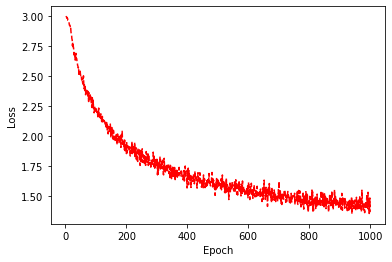

In [10]:
training_loss = history.history['loss']
#test_loss = score.history['val_loss']
epoch_count = range(1, len(training_loss) + 1)
plt.plot(epoch_count, training_loss, 'r--')
#plt.plot(epoch_count, test_loss, 'b-')
#plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

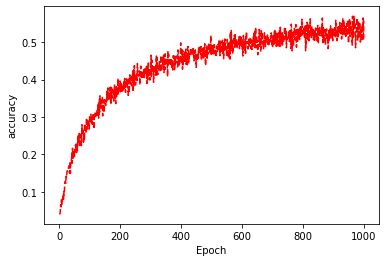

In [11]:
training_loss = history.history['accuracy']
#test_loss = score.history['val_loss']
epoch_count = range(1, len(training_loss) + 1)
plt.plot(epoch_count, training_loss, 'r--')
#plt.plot(epoch_count, test_loss, 'b-')
#plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.show();

In [ ]:
model=load_model('network.h5')
input_image = cv2.imread(r"D:\project\crop_30_in\B01\yaleB01_P00A+000E+45.png")
cv2.imshow('image',input_image)
cv2.waitKey(0)

#img= Image.open()
#k=model.predict()